# Implementacion de Regresion Lineal

https://github.com/sierraporta/data_science_course__Maestr_Estad_UTB/blob/main/Clase%202/linear_regresion.ipynb

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load data

In [5]:
data = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv',sep=',')
print("data.shape=", data.shape)
pd.concat([data.head(),data.tail()])

data.shape= (2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


C:\Users\diego\AppData\Local\Temp/ipykernel_14800/2352615227.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


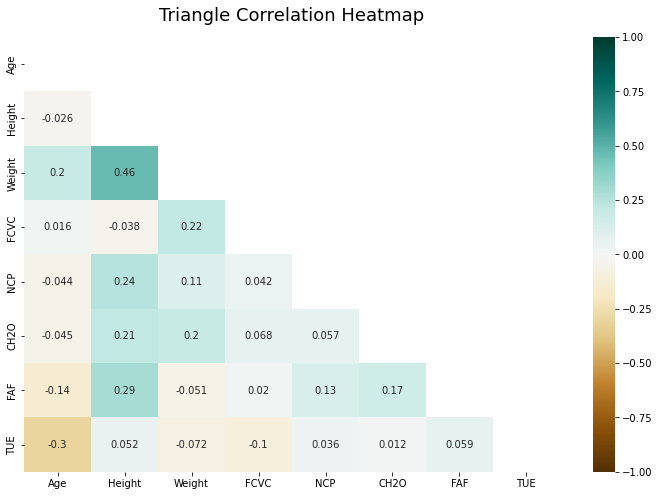

In [6]:
plt.figure(figsize=(12,8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr().round(3), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

## ajuste de variables

In [7]:
data1 = data.copy()

### ajuste de target

In [8]:
target = "NObeyesdad"
new_target = "EsObeso"
data1['EsObeso'] = data1[target].isin(['Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']).map({True:1, False:0})

### ajuste de variables predictoras

In [9]:
data1['Gender'] = data1['Gender'].map({"Female":1, "Male":0})

In [10]:
cols_cat = ['family_history_with_overweight','SMOKE','FAVC','CAEC','SCC','CALC','MTRANS']

In [11]:
for c in cols_cat:
    temp = pd.get_dummies(data1[c], prefix=c, prefix_sep='__')
    data1 = pd.concat([data1.drop(c,axis=1),temp],axis=1)
data1 = data1.drop([c for c in data1 if c.endswith('__no')],axis=1)     ## drop NO at response
data1 = data1[[c for c in data1 if c not in [target,new_target]]+[new_target]]

In [12]:
data1.head()

,Gender,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,family_history_with_overweight__yes,...,SCC__yes,CALC__Always,CALC__Frequently,CALC__Sometimes,MTRANS__Automobile,MTRANS__Bike,MTRANS__Motorbike,MTRANS__Public_Transportation,MTRANS__Walking,EsObeso
0,1,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,...,1,0,0,1,0,0,0,1,0,0
2,0,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,...,0,0,1,0,0,0,0,1,0,0
3,0,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,...,0,0,0,1,0,0,0,1,0,0


C:\Users\diego\AppData\Local\Temp/ipykernel_14800/3820679128.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data1.corr(), dtype=np.bool))


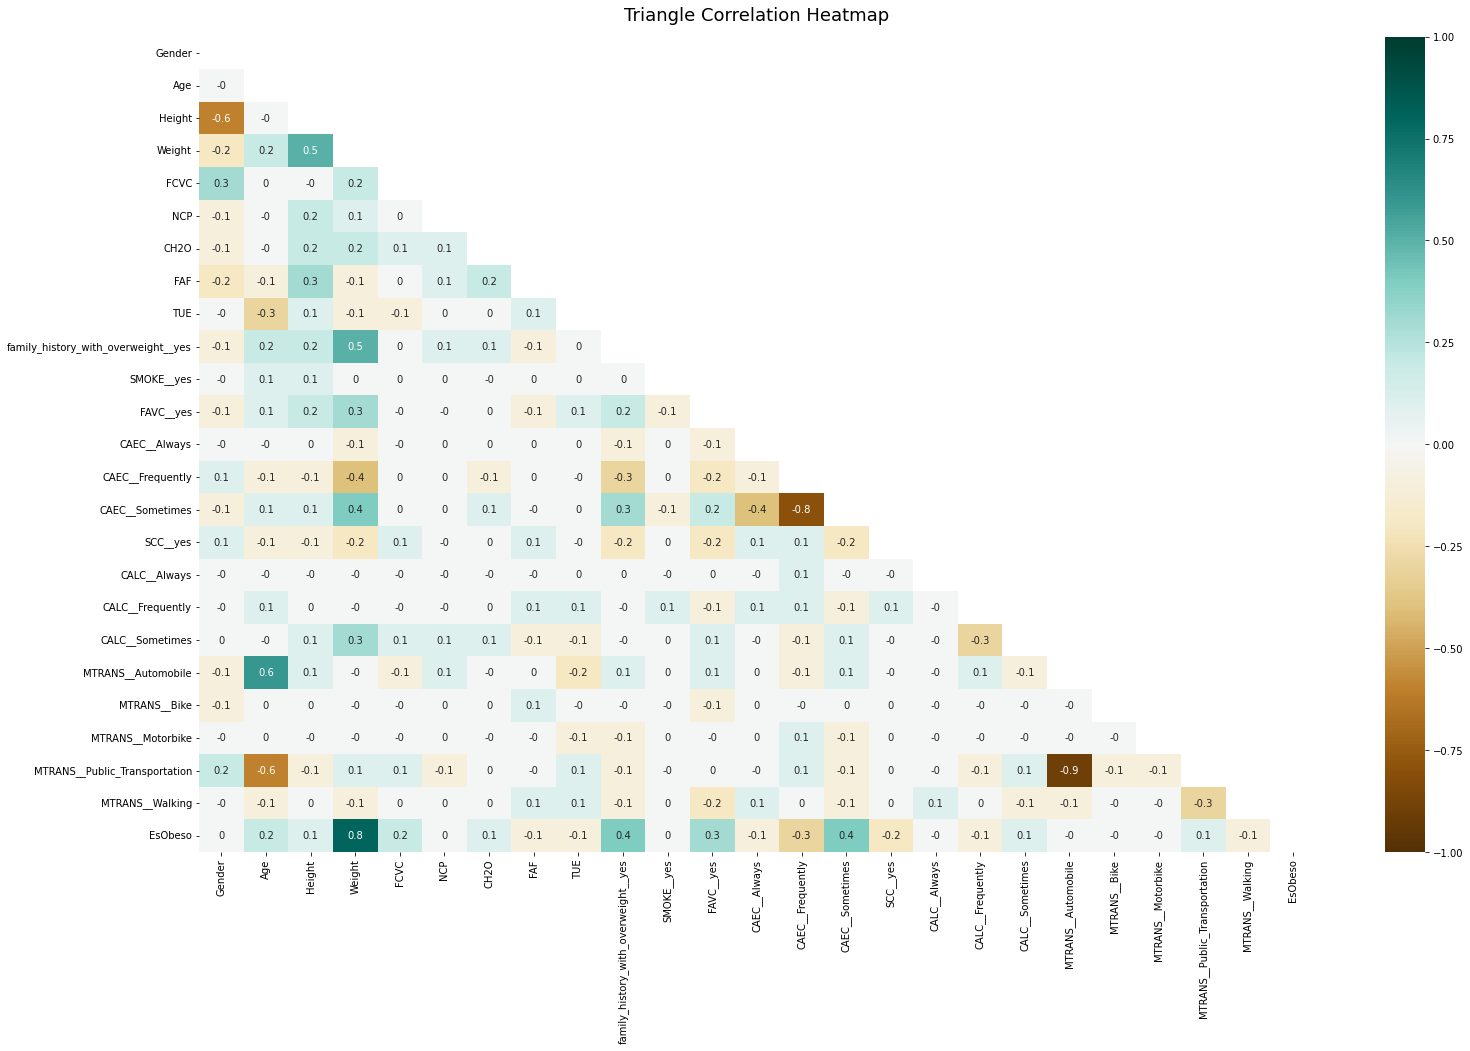

In [13]:
plt.figure(figsize=(25,15))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data1.corr(), dtype=np.bool))
heatmap = sns.heatmap(data1.corr().round(1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

## Optimizar

In [14]:
from scipy import optimize
from sklearn.metrics import r2_score
import random

In [15]:
def f( x, p0, p1):
    return p0+p1*x

def ff(x, p):
    return f(x, *p)

In [16]:
x_var = "Age"
y_var = "Weight"

evaluacion = pd.DataFrame(columns=["a","b","r2"])

#### Using optimize.leastsq

In [17]:
def fit_leastsq(p0, datax, datay, function):

    errfunc = lambda p, x, y: function(x,p) - y

    pfit, pcov, infodict, errmsg, success = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=1, epsfcn=0.0001)

    if (len(datay) > len(p0)) and pcov is not None:
        s_sq = (errfunc(pfit, datax, datay)**2).sum()/(len(datay)-len(p0))
        pcov = pcov * s_sq
    else:
        pcov = np.inf

    error = [] 
    for i in range(len(pfit)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_leastsq = pfit
    perr_leastsq = np.array(error) 
    return pfit_leastsq, perr_leastsq 

In [18]:
# These are the true parameters
p0,p1 = 1.0, 1.0
# These are initial guesses for fits:
pstart = [p0+random.random(),p1+random.random()]
pfit, perr = fit_leastsq(pstart, data1[x_var], data1[y_var], ff)

print("\n# Fit parameters and parameter errors from lestsq method :")
print("pfit = ", pfit)
print("perr = ", perr)

## pearson
evaluacion.loc["lestsq"] = {"a": perr[0]/pfit[0], "b": perr[1]/pfit[1], "r2": r2_score(data1[y_var], f(data1[x_var],*pfit))}


# Fit parameters and parameter errors from lestsq method :
pfit =  [66.26050628  0.83600898]
perr =  [2.21135182 0.08800779]


#### Using optimize.curve_fit

In [19]:
err_stdev = 0.2
def fit_curvefit(p0, datax, datay, function, yerr=err_stdev, **kwargs):
    """
    Note: As per the current documentation (Scipy V1.1.0), sigma (yerr) must be:
        None or M-length sequence or MxM array, optional
    Therefore, replace:
        err_stdev = 0.2
    With:
        err_stdev = [0.2 for item in xdata]
    Or similar, to create an M-length sequence for this example.
    """
    pfit, pcov = optimize.curve_fit(f,datax,datay,p0=p0, sigma=None, epsfcn=0.0001, **kwargs)
    error = [] 
    for i in range(len(pfit)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_curvefit = pfit
    perr_curvefit = np.array(error)
    return pfit_curvefit, perr_curvefit

In [20]:
# These are the true parameters
p0,p1 = 1.0, 1.0
# These are initial guesses for fits:
pstart = [p0+random.random(),p1+random.random()]
pfit, perr = fit_curvefit(pstart, data1[x_var], data1[y_var], ff)

print("\n# Fit parameters and parameter errors from **curve_fit** method :")
print("pfit = ", pfit)
print("perr = ", perr)

## pearson
evaluacion.loc["curve_fit"] = {"a": perr[0]/pfit[0], "b": perr[1]/pfit[1], "r2": r2_score(data1[y_var], f(data1[x_var],*pfit))}


# Fit parameters and parameter errors from **curve_fit** method :
pfit =  [66.26050628  0.83600898]
perr =  [2.21135182 0.08800779]


#### Using bootstrap

In [21]:
def fit_bootstrap(p0, datax, datay, function, yerr_systematic=0.0):

    errfunc = lambda p, x, y: function(x,p) - y

    # Fit first time
    pfit, perr = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=0)


    # Get the stdev of the residuals
    residuals = errfunc(pfit, datax, datay)
    sigma_res = np.std(residuals)

    sigma_err_total = np.sqrt(sigma_res**2 + yerr_systematic**2)

    # 100 random data sets are generated and fitted
    ps = []
    for i in range(100):

        randomDelta = np.random.normal(0., sigma_err_total, len(datay))
        randomdataY = datay + randomDelta
        randomfit, randomcov = optimize.leastsq(errfunc, p0, args=(datax, randomdataY), full_output=0)
        ps.append(randomfit) 

    ps = np.array(ps)
    mean_pfit = np.mean(ps,0)

    # You can choose the confidence interval that you want for your
    # parameter estimates: 
    Nsigma = 1. # 1sigma gets approximately the same as methods above
                # 1sigma corresponds to 68.3% confidence interval
                # 2sigma corresponds to 95.44% confidence interval
    err_pfit = Nsigma * np.std(ps,0) 

    pfit_bootstrap = mean_pfit
    perr_bootstrap = err_pfit
    return pfit_bootstrap, perr_bootstrap 

In [22]:
# These are the true parameters
p0,p1 = 1.0, 1.0
# These are initial guesses for fits:
pstart = [p0+random.random(),p1+random.random()]
pfit, perr = fit_bootstrap(pstart, data1[x_var], data1[y_var], ff)

print("\n# Fit parameters and parameter errors from **fit_bootstrap** method :")
print("pfit = ", pfit)
print("perr = ", perr)

## pearson
evaluacion.loc["fit_bootstrap"] = {"a": perr[0]/pfit[0], "b": perr[1]/pfit[1], "r2": r2_score(data1[y_var], f(data1[x_var],*pfit))}


# Fit parameters and parameter errors from **fit_bootstrap** method :
pfit =  [66.22113957  0.83491047]
perr =  [2.14587459 0.08906757]


## Plot

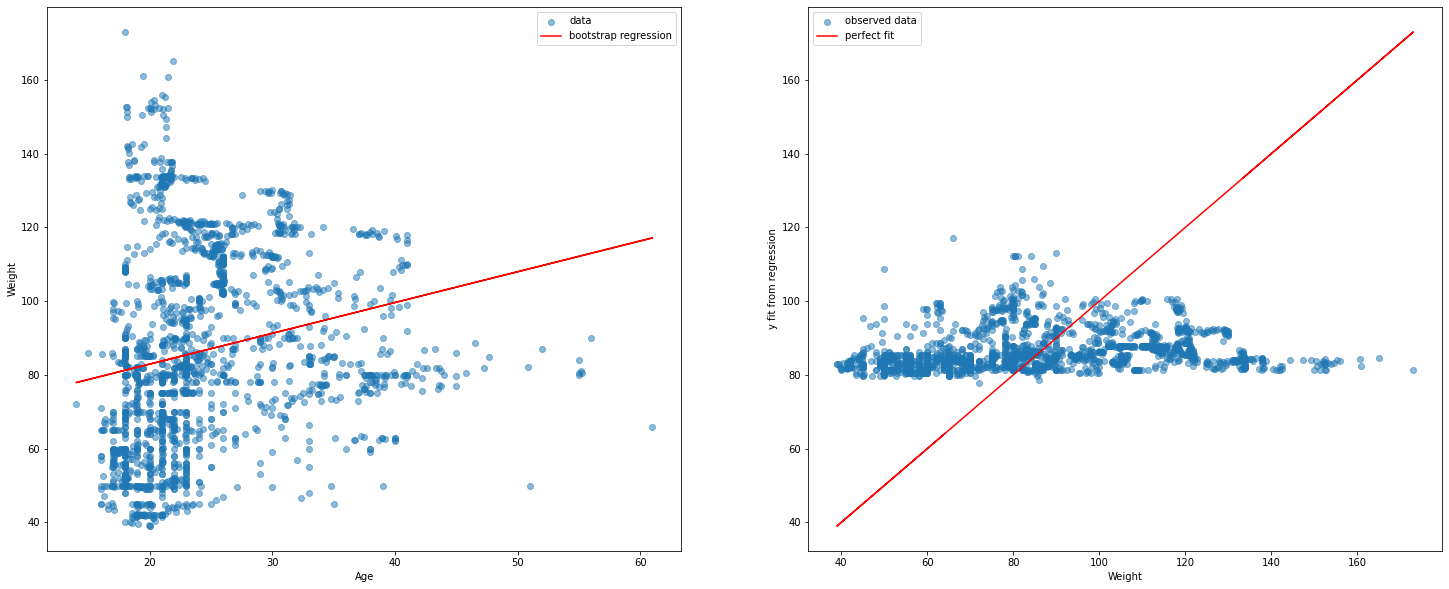

In [23]:
plt.figure(figsize=(25,10))
plt.subplot(121)
plt.scatter(data1[x_var],data1[y_var],label="data",alpha=0.5)
plt.plot(data1[x_var],f(data1[x_var],*pfit),color="r",label="bootstrap regression")
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.legend()
plt.subplot(122)
plt.scatter(data1[y_var],f(data1[x_var],*pfit),label="observed data", alpha=0.5)
plt.plot(data1[y_var],data1[y_var],color="r",label="perfect fit")
plt.xlabel(y_var)
plt.ylabel("y fit from regression")
plt.legend()
plt.show()

In [24]:
evaluacion

,a,b,r2
lestsq,0.033374,0.105271,0.041031
curve_fit,0.033374,0.105271,0.041031
fit_bootstrap,0.032405,0.106679,0.041024


# Regresion Multiple

In [25]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [26]:
# fit the regression model
reg = sm.OLS(data1[y_var], data1[x_var]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Weight   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                          1.631e+04
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                        0.00
Time:                        10:50:40   Log-Likelihood:                         -10218.
No. Observations:                2111   AIC:                                  2.044e+04
Df Residuals:                    2110   BIC:                                  2.044e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            3.3876      0.027    127.703      0.000       3.336       3.440
==============================================================================
Omnibus:                       45.077   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.263
Skew:                          -0.110   Prob(JB):                     1.12e-19
Kurtosis:                       3.971   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Analisis
el R2 de los valores da diferente cuando se analiza Vs StatsModels